In [23]:
# Imports
from math import sqrt
from scipy import stats
from pydataset import data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire
import prepare
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises ##

# Exercise 1

In [6]:
# Create a pandas dataframe, df_iris, from this data.
df_iris = data('iris')


In [7]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [8]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [9]:
# print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
# print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [12]:
# print the unique values for each of your categorical variables

cat = df_iris.select_dtypes(include=['object']).value_counts()

In [13]:
df_iris.select_dtypes(include='O').nunique()

Species    3
dtype: int64

## Exercise 2

In [14]:
# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
df = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

FileNotFoundError: [Errno 2] No such file or directory: 'Excel_Exercises.xlsx'

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails').head(100)

In [ ]:
print(df_excel_sample.shape)

In [ ]:
# print the number of rows of your original dataframe
print(df.shape[0])

In [ ]:
# print the first 5 column names
print(list(df.columns[0:5]))

In [ ]:
# print the column names that have a data type of object
print(df.dtypes[df.dtypes == 'object'])

In [ ]:
# compute the range for each of the numeric variables.
# First, identify columns with numerics
num_col = df.dtypes[(df.dtypes == 'float') | (df.dtypes == 'int')]
print(num_col)

In [ ]:
# compute the range for each of the numeric variables.
num = num.describe().T

In [ ]:
num['range'] = num['max'] - num['min']
num

## Exercise 3

In [ ]:
# get shareable link URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'


In [ ]:
#Turn that into a CSV export URL: Replace /edit with /export; Add format=csv to the beginning of the query string.
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(csv_export_url)

In [15]:
# Pass it to pd.read_csv, which can take a URL.
df_google = pd.read_csv(csv_export_url)
df_google.head()

NameError: name 'csv_export_url' is not defined

In [16]:
# print the first 3 rows
df_google.head(3)

NameError: name 'df_google' is not defined

In [ ]:
# print the number of rows and columns
print(df_google.shape)

In [ ]:
# print the column names
print(list(df_google.columns))

In [ ]:
# print the data type of each column
print(df_google.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

In [ ]:
# print the unique values for each of your categorical variables
df_google.select_dtypes(include='O').nunique()


## Data Prep Exercises ##

In [ ]:

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

import acquire

In [17]:
# Use the function defined in acquire.py to load the iris data.
iris_df = acquire.new_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [18]:
# 2.Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id']
df_iris_dropped = iris_df.drop(columns=cols_to_drop)
df_iris_dropped.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [19]:
# 3) Rename the species_name column to just species.
df_iris_droppedr = df_iris_dropped.rename(columns={'species_name':'species'})
df_iris_droppedr.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [20]:
# 4) Create dummy variables of the species name.
dummy_df = pd.get_dummies(df_iris_droppedr[['species']], dummy_na=False)
dummy_df.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
#5 Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
def prep_iris(df):
    # Drop the species_id and measurement_id columns.
    cols_to_drop = ['species_id']
    df_iris_dropped = iris_df.drop(columns=cols_to_drop)
    # Rename the species_name column to just species.
    df_iris_droppedr = df_iris_dropped.rename(columns={'species_name':'species'})
    # Create dummy variables of the species name.
    dummy_df = pd.get_dummies(df_iris_droppedr[['species']], dummy_na=False)
    # Combine my dfs to form a final cleaned version
    clean_iris_df = pd.concat([df_iris_droppedr, dummy_df], axis=1)
    return clean_iris_df

In [22]:
prep_iris(acquire.new_iris_data()).head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


## Tidy Data ##

#### 1) Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [23]:
# import attendance data
attendance_df = pd.read_csv('untidy-data/attendance.csv')

In [24]:
attendance_df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [25]:
# rename 'Unnamed: 0' column to 'name'
attendance_df = attendance_df.rename(columns = {'Unnamed: 0': 'name'})

In [26]:
# melt the days using attendace status as value
df_melt = attendance_df.melt(id_vars=['name'], var_name='day', value_name='status')
df_melt.head()

,name,day,status
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [27]:
# replace status alpha values with numerics
df_melt['status'] = df_melt['status'].replace({'T':0.9, 'P':1, 'A':0.0, 'H':0.5})

In [28]:
df_melt.head()

,name,day,status
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [29]:
# groupby to aggregate values and determine attendance days
df_melt.groupby(by=['name']).mean()

,status
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


#### 2) Coffee Levels

In [30]:
# Read the coffee_levels.csv file.
coffee_df = pd.read_csv('untidy-data/coffee_levels.csv')

In [31]:
coffee_df.head(25)

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [32]:
# Transform the data so that each carafe is in it's own column.
coffee_df_piv = coffee_df.pivot_table(index=['hour'], columns='coffee_carafe', values='coffee_amount')

In [33]:
coffee_df_piv

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [34]:
# Is this the best shape for the data? Sure appear so

#### 3) Cake Recipes

In [35]:
# Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
cake_df = pd.read_csv('untidy-data/cake_recipes.csv')

In [36]:
cake_df

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [37]:
# Clean up the double entry column and split values into two separate columns
cake_df[['recipe', 'position']] = cake_df['recipe:position'].str.split(':', expand=True)

In [38]:
# Delete original coulumn to cleanup double entries
del cake_df['recipe:position']

In [39]:
# check
cake_df

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [40]:
# Which recipe, on average, is the best? recipe b

# Melt the temps into dataframe
melted_cake = cake_df.melt(id_vars=['recipe', 'position'], var_name='temp', value_name='score')
# Take the mean of scores across recipe
melted_cake.groupby(by=['recipe']).mean()

# Judging best by avg taste scores, Recipe B would be best

,score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


In [41]:
# Which oven temperature, on average, produces the best results? 275

# Take the mean of scores across temperature
melted_cake.groupby(by=['temp']).mean()

# 275 degrees, on avg, produces best results

,score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [42]:
# Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees
melted_cake.nlargest(1, ['score'])

,recipe,position,temp,score
26,b,bottom,300,99.248541


## Exploratory Analysis ##

In [15]:
# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
# Acquire, prepare & split your data.

iris_ex = acquire.new_iris_data()
iris_ex.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [16]:
# Prep by dropping redundant data = species_id
iris_ex = iris_ex.drop(columns=['species_id'])

In [45]:
# Split Data

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [46]:
train, validate, test = train_validate_test_split(iris_ex, target='species_name')
train.head()

NameError: name 'train_test_split' is not defined

In [ ]:
# 2. Univariate Stats
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
import seaborn as sns
from sklearn.model_selection import train_test_split

cat_vars = ['species_name', 'species_id']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, var in enumerate(quant_vars):
    sns.boxplot(var, 'species_name', data=train,
               ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Species')
    ax[i].set_title(var)

In [ ]:
train.sepal_length.hist()

In [ ]:
train.sepal_width.hist()

In [ ]:
train.petal_width.hist()

In [ ]:
train.petal_length.hist()

In [ ]:
For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
train.sepal_width.describe()

In [ ]:
train.petal_length.describe()

In [ ]:
train.petal_width.describe()

In [ ]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
freq = train.species_name.value_counts()
freq

In [ ]:
train.species_name.value_counts().plot(kind='bar', color=['red', 'blue', 'green'], rot=0, alpha =.65)
plt.xlabel('Species')
plt.ylim(25, 29)
plt.title('Count by Species')

In [ ]:
# Document takeaways & any actions.
 # Petal size would be a much better predictive variable vs sepal size

In [ ]:
# Bivariate Stats
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

measure = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
allmean = measure.mean()

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
for i, var in enumerate(quant_vars):
    sns.barplot('species_name', var, data=train,
               ax=ax[i], alpha=0.85)
    ax[i].set_xlabel('Species')
    ax[i].set_ylabel('')
    ax[i].set_title(var)
    ax[i].axhline(allmean, ls='--', color='grey')

In [ ]:
# For each measurement type, compute the descriptive statistics for each species.
pd.crosstab(train.species_name, aggfunc.petal_length).describe()

In [ ]:
pd.crosstab(train.sepal_width, train.species_name).describe()

In [ ]:
pd.crosstab(train.petal_length, train.species_name).describe()

In [ ]:
pd.crosstab(train.petal_width, train.species_name).describe()

#### Document takeaways & any actions:
The train dataset splits the data into equal frequencies for the categorical variable.
Sepal has outliers (wont be good for modeling)
Building a model would be best within the quantitative variables (petal_length, pedal_width)

In [ ]:
# 3. Bivariate Stats
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [ ]:
pl_mean = train.petal_length.mean()
p_length = sns.barplot(x = 'species_name', data=train, y='petal_length')
p_length.axhline(pl_mean, ls='--', color='grey')

In [ ]:
pw_mean = train.petal_width.mean()
p_width = sns.barplot(x='species_name', data=train, y='petal_width')
p_width.axhline(pw_mean, ls='--', color='grey')

In [ ]:
sepal_mean = train.sepal_length.mean()
s_length = sns.barplot(x='species_name', data=train, y='sepal_length')
s_length.axhline(sepal_mean, ls='--', color='grey')

In [ ]:
sw_mean = train.sepal_width.mean()
s_width = sns.barplot(x = 'species_name', data=train, y='sepal_width')
s_width.axhline(sw_mean, ls='--', color='grey')

In [ ]:
# For each measurement type, compute the descriptive statistics for each species
train.groupby(by=['species_name']).describe().T

In [64]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [17]:
# Split the data
iris_train, iris_validate, iris_test= prepare.split_data(iris_ex)

iris_train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


In [ ]:
# 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.¶
# sepa_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length

In [20]:
#create new column for sepal area and petal area
iris_train['sepal_area']= iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area']= iris_train['petal_length'] * iris_train['petal_width']

In [21]:
iris_train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


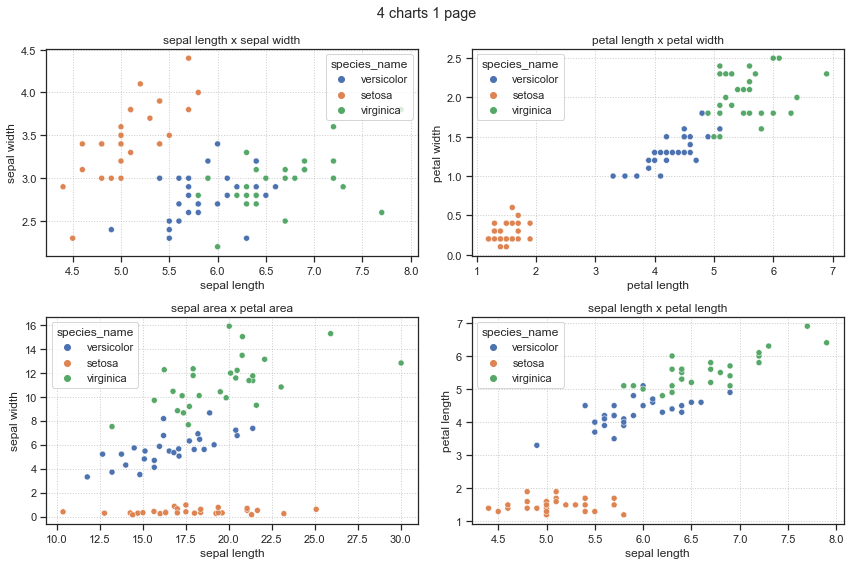

In [28]:
fig = plt.figure(figsize = (12, 8))
plt.suptitle('4 charts 1 page')

# x1 = iris_train['sepal_length']
# y1 = iris_train['sepal_width']

# x2 = iris_train['petal_length']
# y2 = iris_train['petal_width']

# x3 = iris_train['sepal_area']
# y3 = iris_train['petal_area']

# x4 = iris_train['sepal_length']
# y4 = iris_train['petal_length']



plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species_name', data=iris_train)



plt.subplot(2, 2, 2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='petal_length', y='petal_width', hue='species_name', data=iris_train)


plt.subplot(2, 2, 3)
plt.title('sepal area x petal area')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species_name', data=iris_train)



plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species_name', data=iris_train)

plt.subplots_adjust(left=None, 
                 bottom=0.1, 
                right=None, 
                top=None, 
                wspace=None,
                hspace=None)

plt.tight_layout()

plt.show()

<AxesSubplot:>

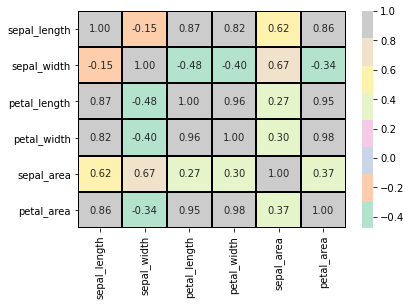

In [25]:
# 4. Create a heatmap of each variable layering correlation coefficient on top
sns.heatmap(iris_train.corr(), cmap= 'Pastel2',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')


In [26]:
# 5. Create a scatter matrix visualizing the interaction of each variable.

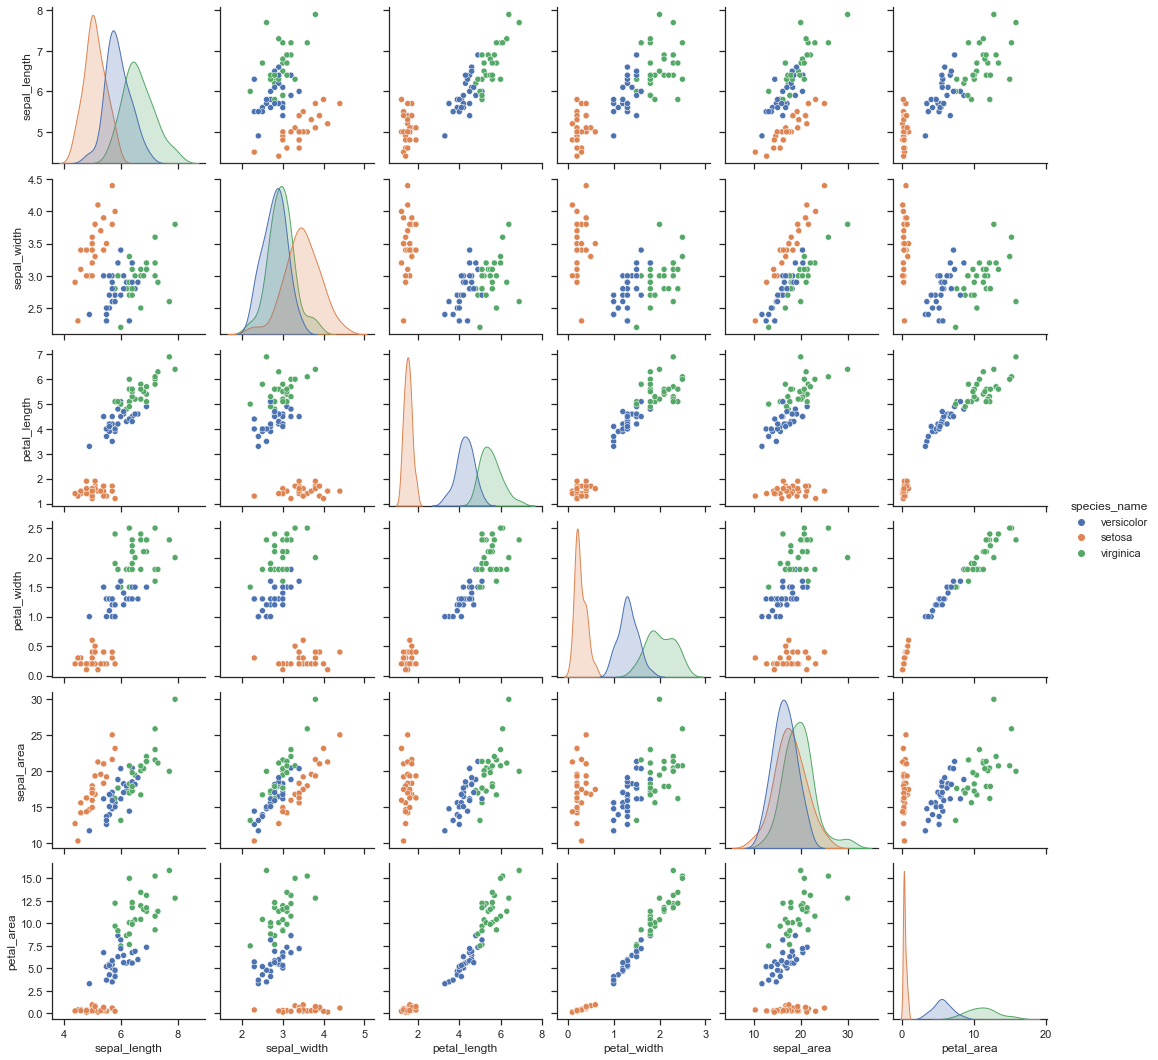

In [29]:
sns.set_theme(style="ticks")

df = iris_train
sns.pairplot(df, hue="species_name")

In [ ]:
# 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.
# Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

Hypothesis¶
alpha = .05

$H_o$: Sepal length is the same

$H_a$: Sepal length is significantly differen

In [ ]:
# - What is your takeaway from this statistical testing?

In [31]:
x= iris_train[iris_train.species_name == 'virginica'].sepal_length.dropna()
y= iris_train[iris_train.species_name == 'versicolor'].sepal_length.dropna()

In [32]:
t,p = stats.ttest_ind(x, y, equal_var= False)

t, p

(5.656491804882077, 6.856736413800083e-07)

In [34]:
alpha= 0.05

if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [35]:
# 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set

In [36]:
sa = iris_train['sepal_area'][iris_train['species_name']!='setosa']
pa = iris_train['petal_area'][iris_train['species_name']!='setosa']
vs = iris_train['species_name'][iris_train['species_name']!='setosa']

In [37]:
sa.head()

79     14.82
133    17.64
95     17.10
139    21.39
115    20.48
Name: sepal_area, dtype: float64

In [38]:
pa.head()

79      3.50
133     7.65
95      5.04
139    11.34
115    12.19
Name: petal_area, dtype: float64

In [39]:
vs.head()

79     versicolor
133     virginica
95     versicolor
139     virginica
115     virginica
Name: species_name, dtype: object

In [40]:
iris_train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


<AxesSubplot:xlabel='species_name', ylabel='sepal_area'>

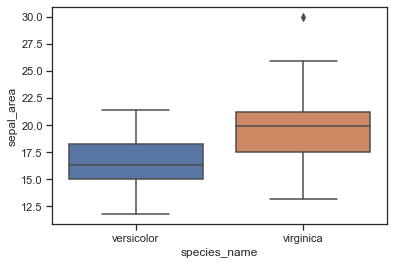

In [41]:
sns.boxplot(x=vs, y=sa)

<AxesSubplot:xlabel='species_name', ylabel='petal_area'>

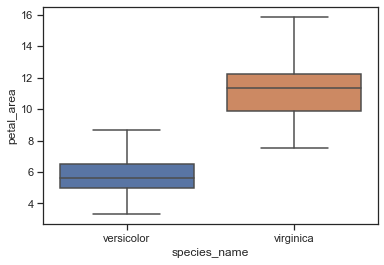

In [42]:
sns.boxplot(x=vs, y=pa)